In [2]:
%matplotlib inline 
import numpy as np
import numpy.linalg as linalg
import math
import scipy
import matplotlib.pyplot as plt
import matplotlib
#ignore divide by 0 warnings
import warnings
warnings.filterwarnings('ignore')

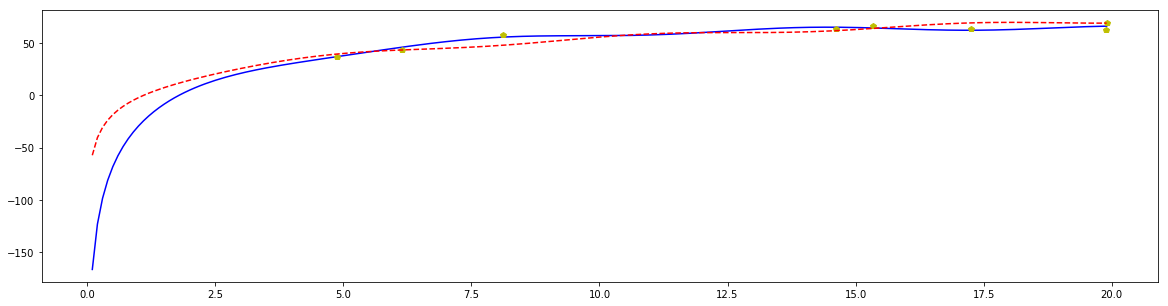

In [43]:
xs = np.random.random(8) * 20
a, b, c = -25 + np.random.random()*50, -1 + np.random.random()*2, -25 + np.random.random()*50
ys = [a*np.log(x) + b*np.sqrt(x) + c*np.sin(x) + np.random.normal()*5 for x in xs]

# LIN REGRESSION
A = np.array([np.log(xs), np.sqrt(xs), np.sin(xs)])
a_, b_, c_ = linalg.lstsq(A.T,ys)[0]
# LIN REGRESSION

xs_ = [x/10. for x in range(-1, 200)]
ys_ = [a_*np.log(x) + b_*np.sqrt(x) + c_*np.sin(x) for x in xs_]
ys_actual = [a*np.log(x) + b*np.sqrt(x) + c*np.sin(x) for x in xs_]
plt.figure(figsize=(20,5))
plt.plot(xs_, ys_, 'b', xs, ys, 'yp', xs_, ys_actual, 'r--')
plt.show()

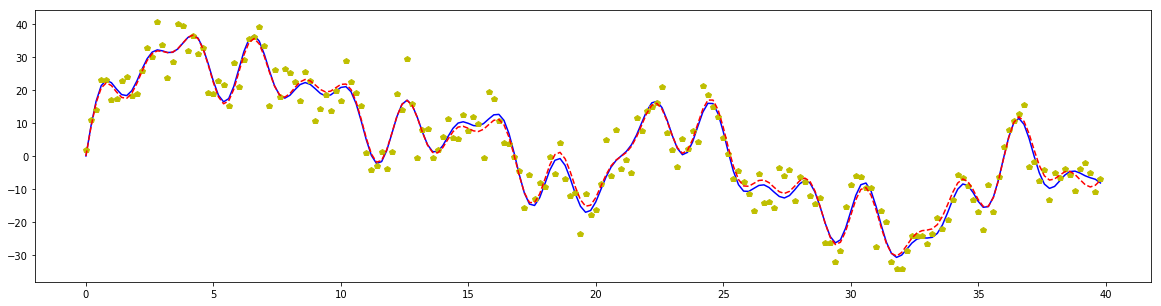

In [40]:
primes = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71]
num_sinusoids, freqs = 10, [2*math.pi/i for i in primes]
noise = 5
amps_, freqs_ = np.random.random(num_sinusoids)*10, np.copy(freqs)
np.random.shuffle(freqs_)
freqs_ = freqs_[:num_sinusoids]

xs = np.array([x/5. for x in range(200)])
ys_, data = [], []
for x in xs:
    y = 0
    for a, f in zip(amps_, freqs_):
        y += a*math.sin(f*x)
    ys_.append(y)
    data.append(y + np.random.normal()*noise)

# LIN REGRESSION
A = np.array([np.sin(f * xs) for f in freqs]) # domain augmentation
amps = linalg.lstsq(A.T,data)[0] # obtaining the amps
# LIN REGRESSION

ys = []
for x in xs:
    y = 0
    for a, f in zip(amps, freqs):
        y += a*math.sin(f*x)
    ys.append(y)

plt.figure(figsize=(20,5))
plt.plot(xs, ys, 'b', xs, data, 'yp', xs, ys_, 'r--')
plt.savefig('regression.png')
plt.show()